The dataset has the following key columns:

Product and Category Information: product_id, product_category_name
Date: month_year
Sales Metrics: qty (quantity sold), total_price, unit_price, and freight_price
Product Details: product_name_length, product_description_length, product_photos_qty
Competitor Pricing and Scores: comp_1, comp_2, comp_3 (competitor prices), ps1, ps2, ps3 (product scores), fp1, fp2, fp3 (freight prices from competitors)
Lag Feature: lag_price (previous period’s price)

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\sageo\OneDrive\Desktop\machine learning\retail_price.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [2]:
data.shape

(676, 30)

In [3]:
# Check for missing values in each column
data.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

lag_price, total_price and comp1 price are highly positively correlated with unit_price and year is highly negatively correlated with unit_price

C:\Users\sageo\AppData\Local\Temp\ipykernel_22432\113184847.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


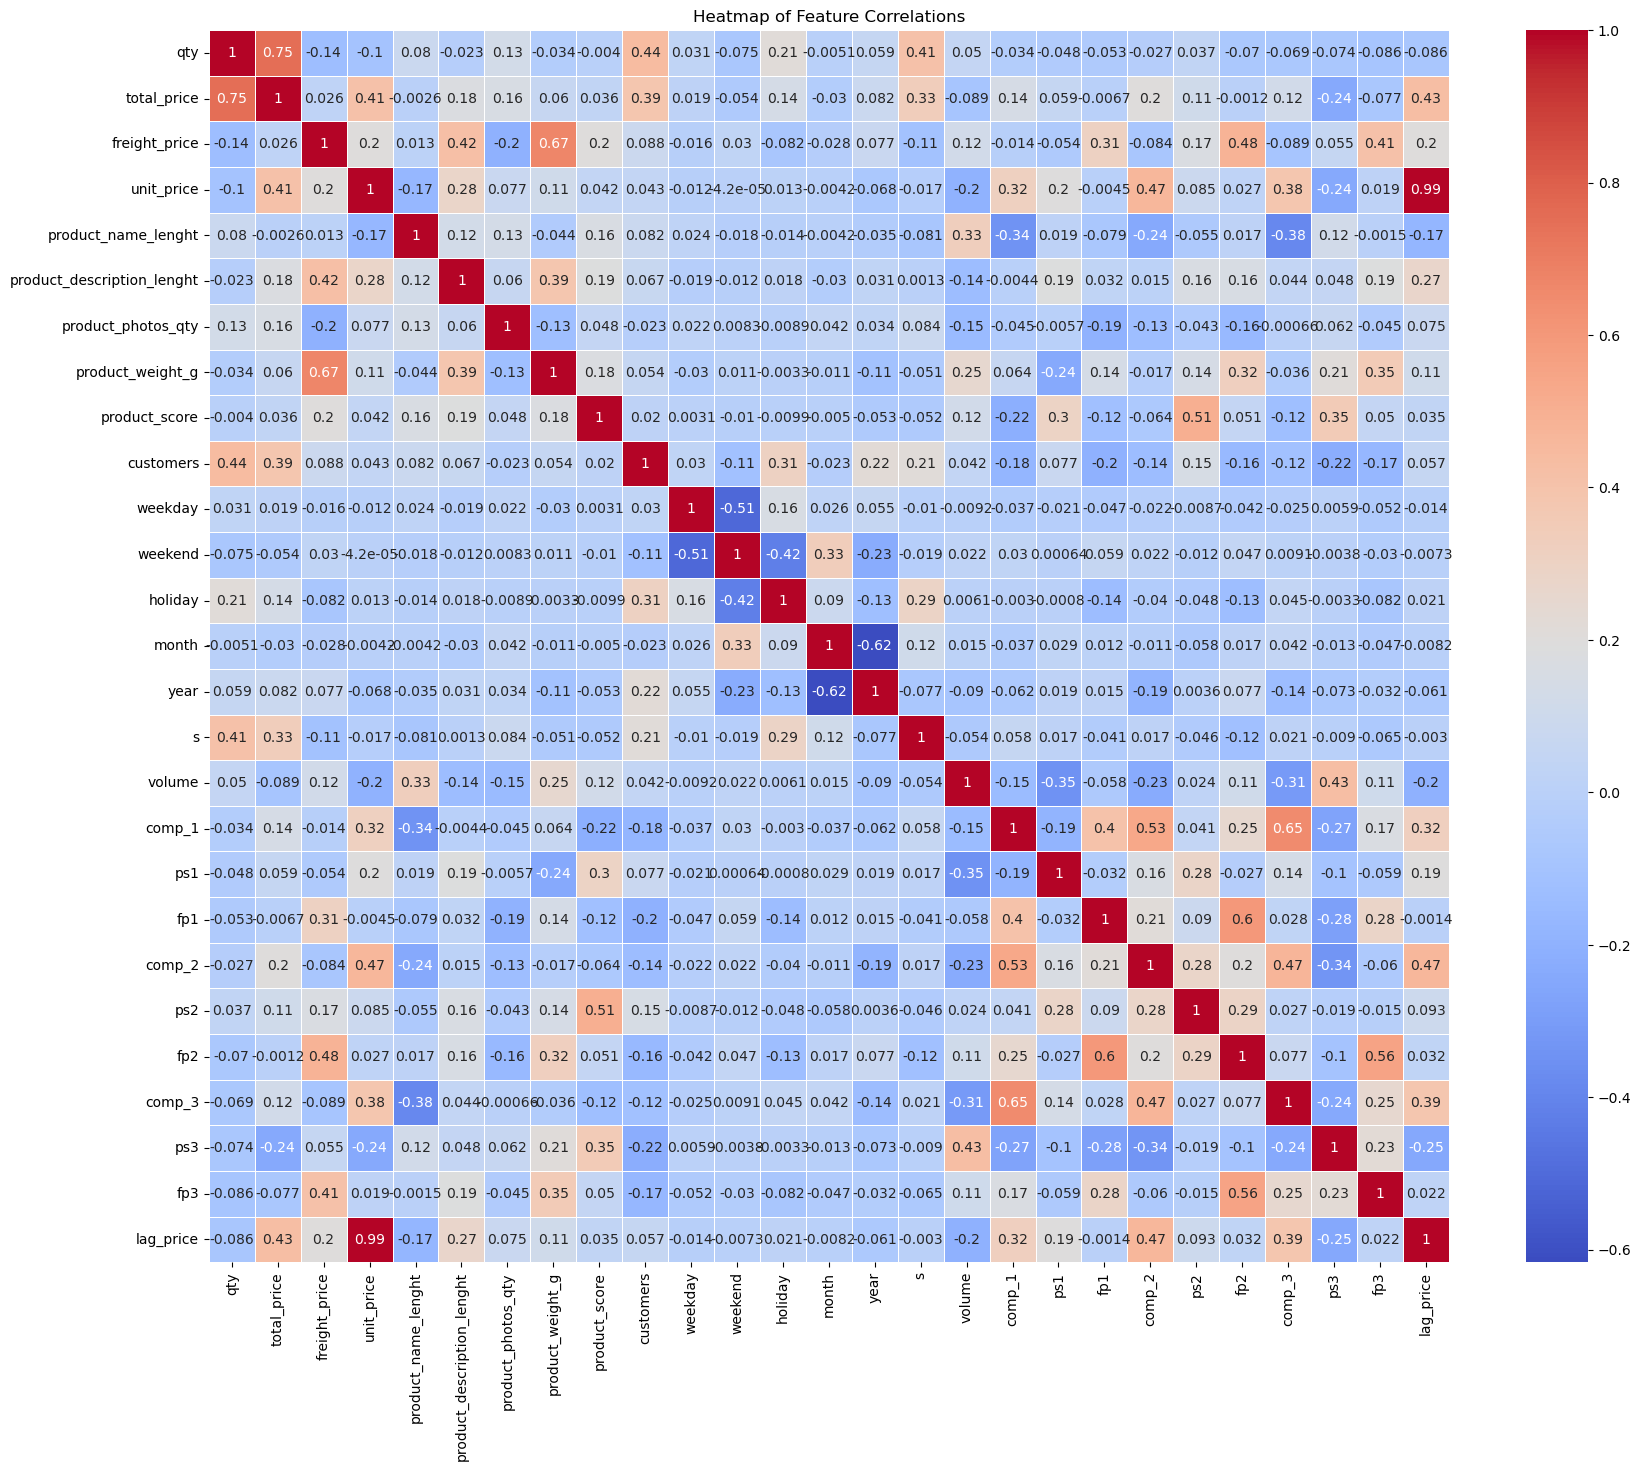

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))

# Plotting a heatmap of the correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

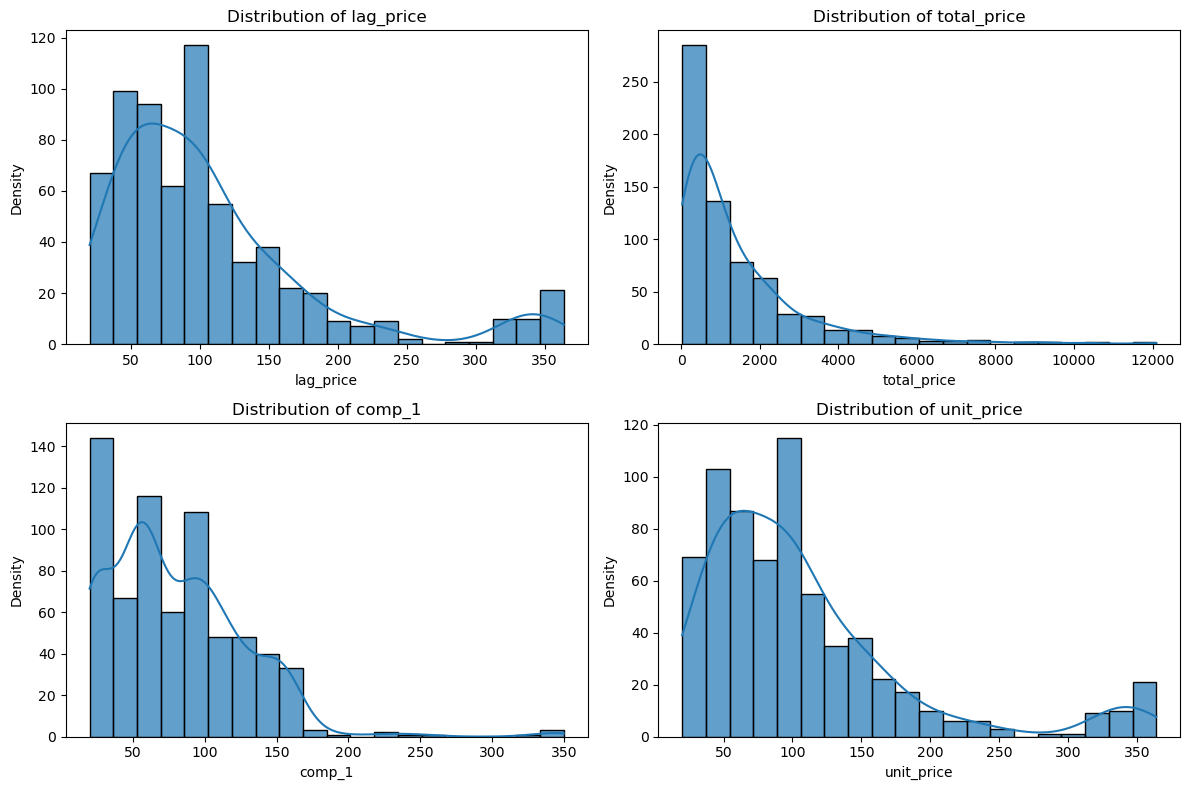

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specified columns to plot
columns_to_plot = ["lag_price", "total_price", "comp_1", "unit_price"]

# Setting figure size and plotting each column with KDE (Kernel Density Estimate)
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True, bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Applying tight layout for better spacing
plt.tight_layout()
plt.show()

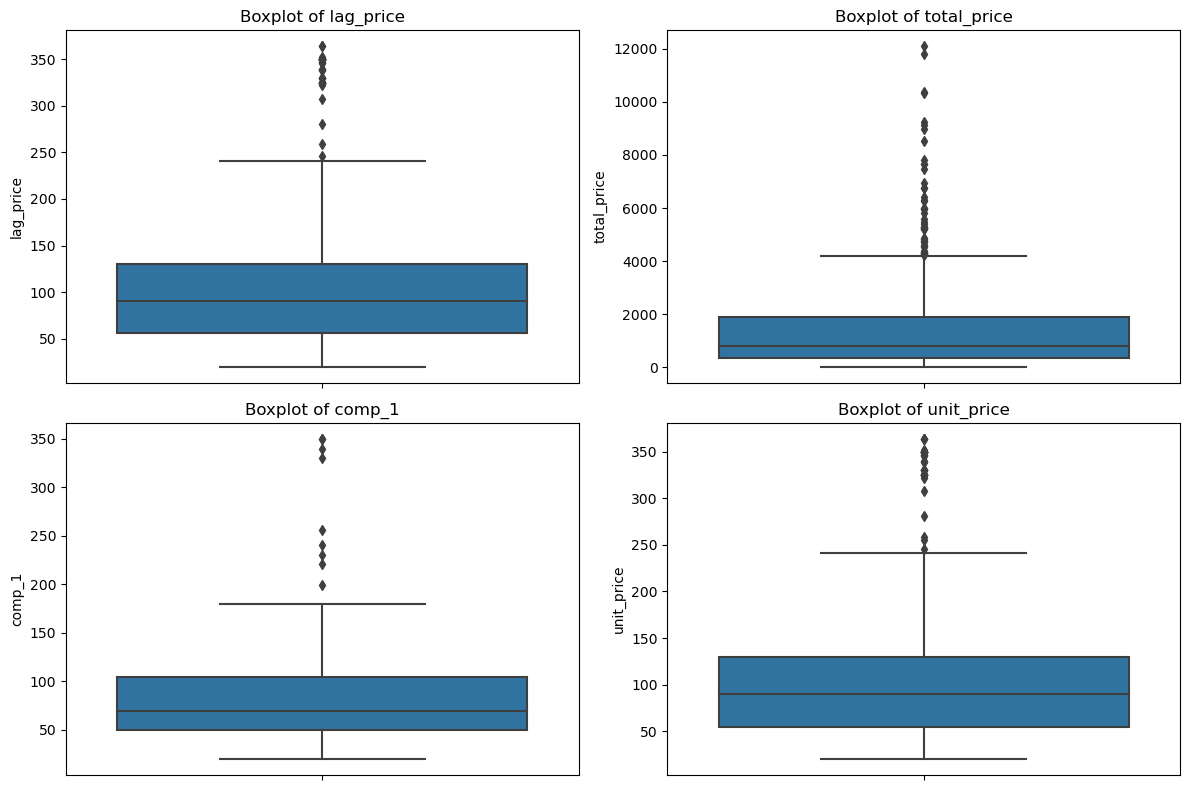

In [7]:
# Plotting boxplots for specified features: 'lag_price', 'total_price', 'comp_1', 'unit_price'
plt.figure(figsize=(12, 8))

# Specified columns to plot
columns_to_plot = ["lag_price", "total_price", "comp_1", "unit_price"]

# Plotting each feature in a separate subplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Applying tight layout for better spacing
plt.tight_layout()
plt.show()

In [8]:
# Function to calculate the number of outliers in each feature based on IQR
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Checking for outliers in the specified features
features_to_check = ["lag_price", "total_price", "comp_1", "unit_price"]
outliers_count = {feature: count_outliers(data, feature) for feature in features_to_check}
outliers_count

{'lag_price': 45, 'total_price': 46, 'comp_1': 9, 'unit_price': 45}

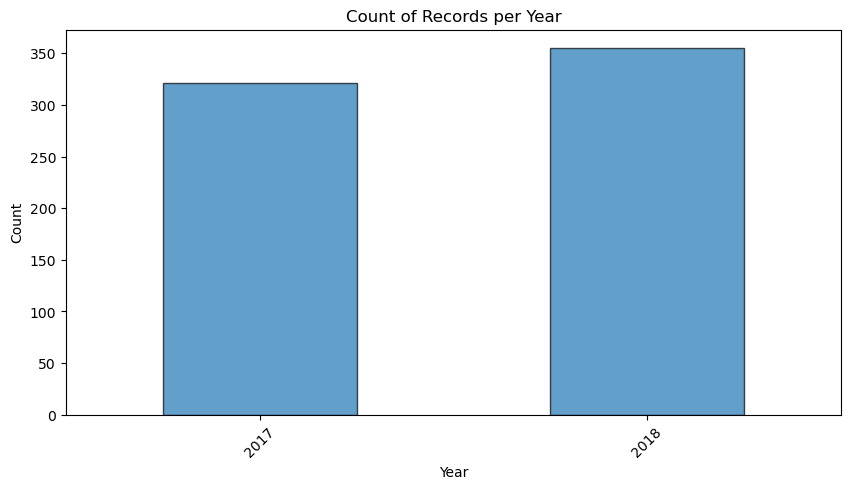

In [6]:
# Plotting bar graphs for 'year' and 'product_category_name' features
import matplotlib.pyplot as plt

# Assuming the 'year' can be extracted from 'month_year' if necessary
if 'year' not in data.columns:
    data['year'] = pd.to_datetime(data['month_year'], format='%m-%Y').dt.year

# Plotting the count of records per year
plt.figure(figsize=(10, 5))
data['year'].value_counts().sort_index().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Count of Records per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()